In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

In [37]:
df = pd.read_csv("/content/cancer patient data sets (1).csv")

# Data Preprocessing

In [38]:
df.shape

(1000, 26)

In [39]:
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [40]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


# Feature Engineering

In [41]:
df.drop(columns = ['index','Patient Id'], inplace = True)

In [42]:
df


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [43]:
df.dtypes # to check data types of columns

,0
Age,int64
Gender,int64
Air Pollution,int64
Alcohol use,int64
Dust Allergy,int64
OccuPational Hazards,int64
Genetic Risk,int64
chronic Lung Disease,int64
Balanced Diet,int64
Obesity,int64


/tmp/ipython-input-3960806351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Level', palette='Set2')


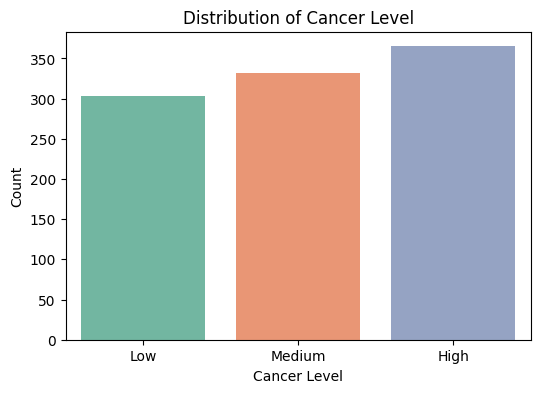

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Level', palette='Set2')
plt.title('Distribution of Cancer Level')
plt.xlabel('Cancer Level')
plt.ylabel('Count')
plt.show()

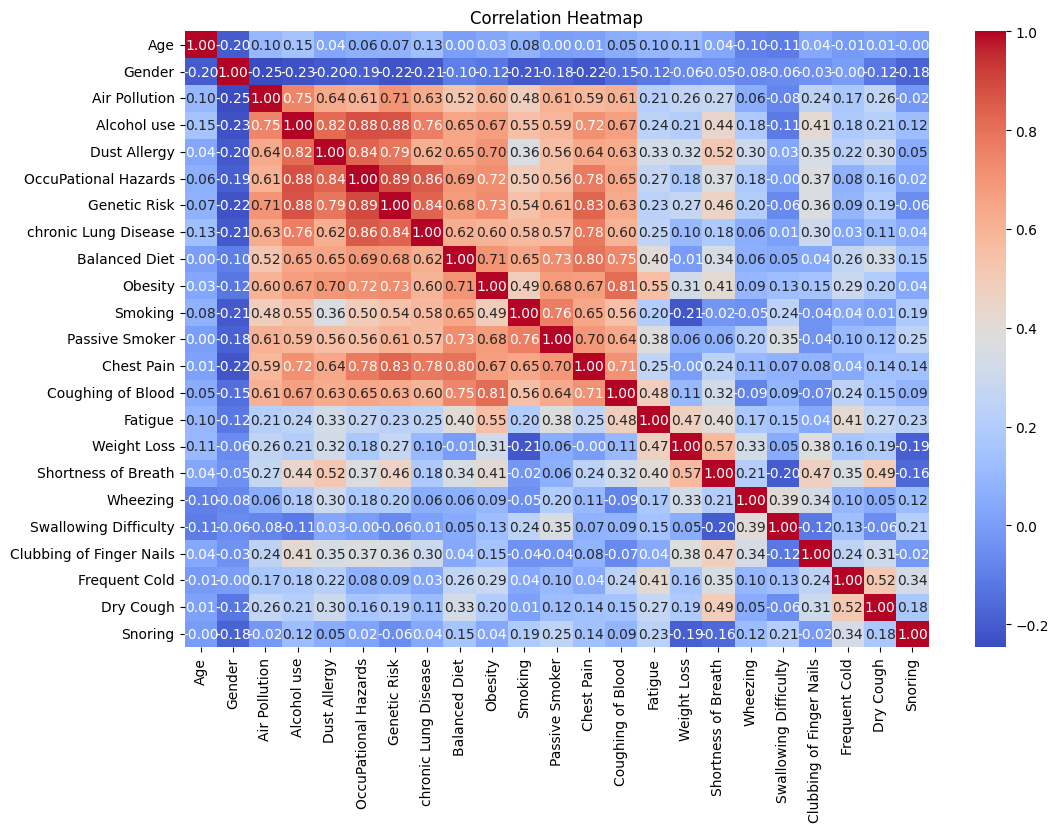

In [45]:
correlation_matrix = df.drop(columns=['Level']).corr()  # Compute the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
df['Level'].value_counts()

,count
Level,
High,365
Medium,332
Low,303


In [47]:
scale_mapper = {'Low':0,
   'Medium' : 1,
   'High' :2

}
df['Level'] = df['Level'].replace(scale_mapper)

/tmp/ipython-input-1467449260.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Level'] = df['Level'].replace(scale_mapper)


Correlation of features with cancer severity level:
Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Age                         0.060048
Gender                     -0.164985
Name: Level, dtype: float64


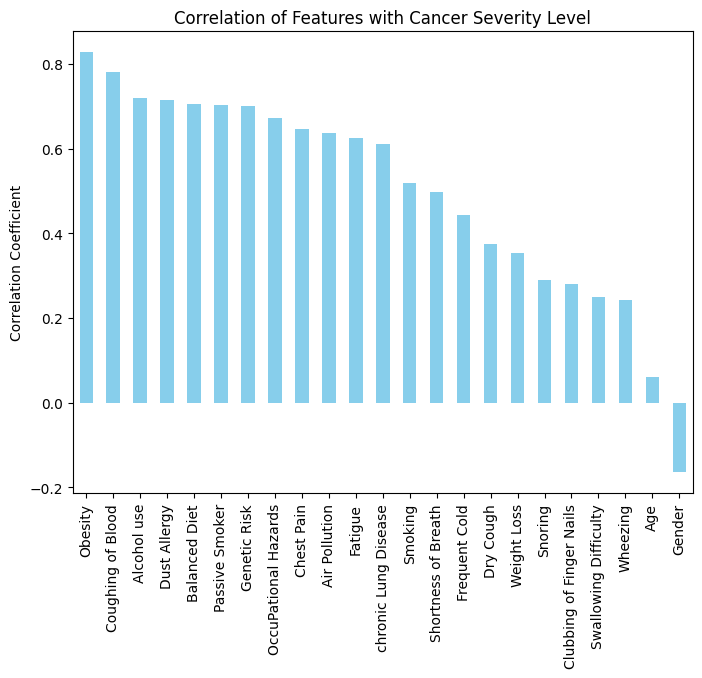

In [48]:
# Now calculate correlation
correlation_with_level = df.corr(numeric_only=True)['Level'].drop('Level').sort_values(ascending=False)

# Display correlations
print("Correlation of features with cancer severity level:")
print(correlation_with_level)

# Plot
plt.figure(figsize=(8,6))
correlation_with_level.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Cancer Severity Level')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

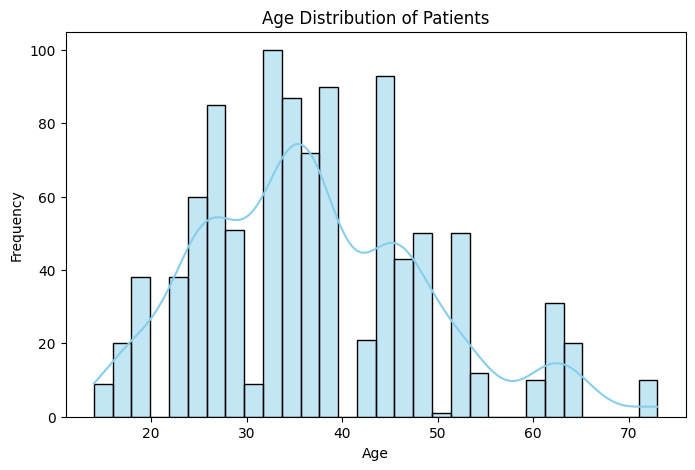

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

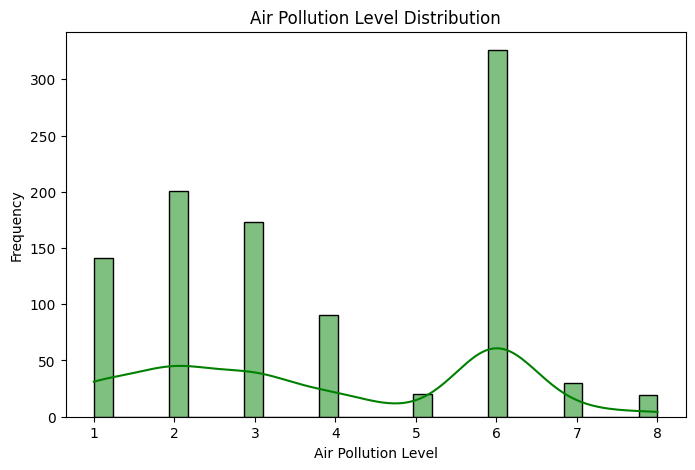

In [50]:
# Air Pollution distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Air Pollution'], bins=30, kde=True, color='green')
plt.title('Air Pollution Level Distribution')
plt.xlabel('Air Pollution Level')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-2037776200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y='Age', data=df, palette='Set2')


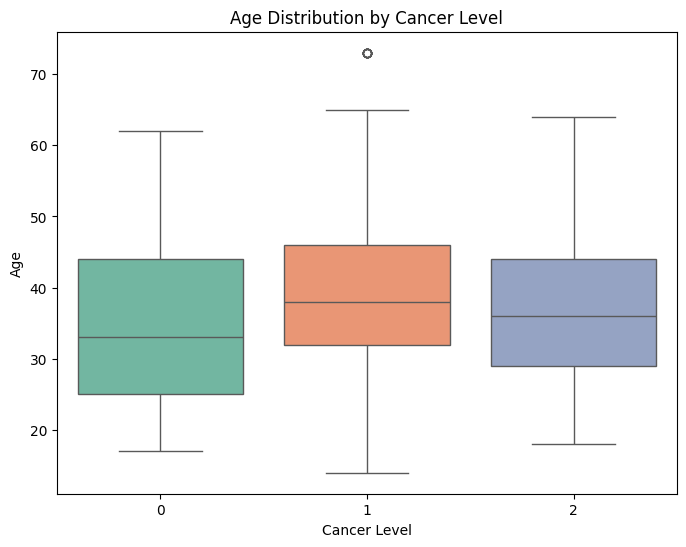

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Level', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Cancer Level')
plt.xlabel('Cancer Level')
plt.ylabel('Age')
plt.show()

/tmp/ipython-input-2492026052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Level', y='Air Pollution', data=df, palette='Set2')


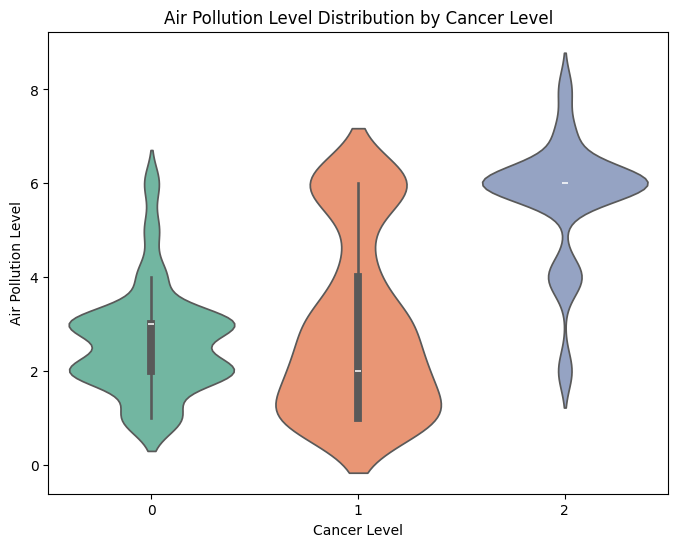

In [52]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Level', y='Air Pollution', data=df, palette='Set2')
plt.title('Air Pollution Level Distribution by Cancer Level')
plt.xlabel('Cancer Level')
plt.ylabel('Air Pollution Level')
plt.show()

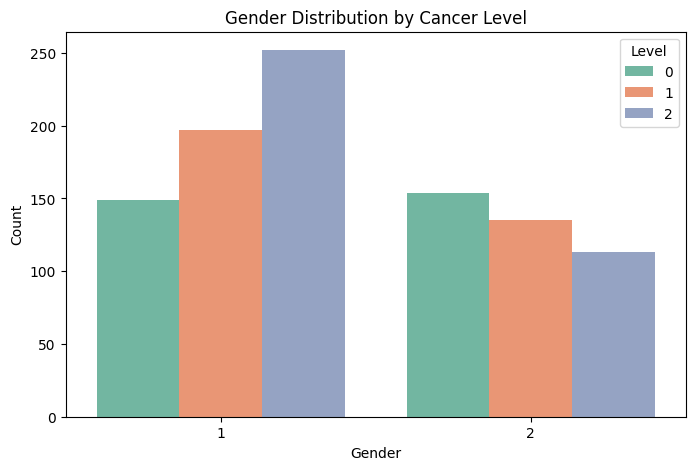

In [53]:
# Bar plot for 'Gender' by 'Cancer Level'
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Gender', hue='Level', palette='Set2')
plt.title('Gender Distribution by Cancer Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [55]:
x = df.drop('Level', axis = 1)
y = df['Level']

In [54]:
# Identify categorical & numeric columns
categorical_cols = x.select_dtypes(include=['object']).columns
numeric_cols = x.select_dtypes(exclude=['object']).columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 43)

In [57]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
preds = model.predict(x_test)
preds


array([1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2,
       2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2,
       2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1,
       0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1,
       1, 2])

In [59]:
np.array(y_test)

array([1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2,
       2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2,
       2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1,
       0, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1,
       1, 2])

In [60]:
cm = confusion_matrix(y_test, preds)
cm

array([[55,  0,  0],
       [ 1, 67,  0],
       [ 0,  0, 77]])

In [61]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.99      0.99        68
           2       1.00      1.00      1.00        77

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [62]:
def classifier(model1):
    model1.fit(x_train,y_train)
    y_preds = model1.predict(x_test)
    print(y_preds)
    print(classification_report(y_test, preds))

In [63]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [64]:
classifier(knn_model)

[1 2 1 0 0 1 0 2 2 2 1 1 2 1 2 1 1 2 0 1 1 2 2 1 0 0 1 0 0 2 0 0 1 2 0 0 2
 1 0 0 2 1 1 1 1 2 1 2 2 1 1 2 0 1 2 2 2 2 0 0 2 0 2 0 1 2 2 0 2 0 2 1 2 0
 2 2 0 0 1 2 0 2 1 0 1 0 2 1 2 1 2 0 0 1 1 1 0 1 1 0 2 0 0 0 2 0 2 2 1 2 2
 1 0 1 1 0 2 2 2 2 0 0 2 1 1 0 2 1 1 1 2 2 1 2 1 0 0 0 0 2 2 1 1 2 1 2 0 0
 2 2 1 2 1 2 2 1 2 1 1 2 1 0 0 2 2 2 1 2 2 0 2 1 1 1 0 1 0 2 1 0 1 2 2 1 1
 2 2 2 0 1 0 2 1 2 0 1 2 1 1 2]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.99      0.99        68
           2       1.00      1.00      1.00        77

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [65]:
decision_tree_classifier = DecisionTreeClassifier()

In [66]:
classifier(decision_tree_classifier)

[1 2 1 0 0 1 0 2 2 2 1 1 2 1 2 1 1 2 0 1 1 2 2 1 0 0 1 0 0 2 0 0 1 2 0 0 2
 1 0 0 2 1 1 1 1 2 1 2 2 1 1 2 0 1 2 2 2 2 0 0 2 0 2 0 1 2 2 0 2 0 2 1 2 0
 2 2 0 0 1 2 0 2 1 0 1 0 2 1 2 1 2 0 0 1 1 1 0 1 1 0 2 0 0 0 2 0 2 2 1 2 2
 1 0 1 1 0 2 2 2 2 0 0 2 1 1 0 2 1 1 1 2 2 1 2 1 0 0 0 0 2 2 1 1 2 1 2 0 0
 2 2 1 2 1 2 2 1 2 1 1 2 1 0 0 2 2 2 1 2 2 0 2 1 1 1 0 1 0 2 1 0 1 2 2 1 1
 2 2 2 0 1 0 2 1 2 0 1 2 1 1 2]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.99      0.99        68
           2       1.00      1.00      1.00        77

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [67]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)

In [68]:
classifier(random_forest_classifier)

[1 2 1 0 0 1 0 2 2 2 1 1 2 1 2 1 1 2 0 1 1 2 2 1 0 0 1 0 0 2 0 0 1 2 0 0 2
 1 0 0 2 1 1 1 1 2 1 2 2 1 1 2 0 1 2 2 2 2 0 0 2 0 2 0 1 2 2 0 2 0 2 1 2 0
 2 2 0 0 1 2 0 2 1 0 1 0 2 1 2 1 2 0 0 1 1 1 0 1 1 0 2 0 0 0 2 0 2 2 1 2 2
 1 0 1 1 0 2 2 2 2 0 0 2 1 1 0 2 1 1 1 2 2 1 2 1 0 0 0 0 2 2 1 1 2 1 2 0 0
 2 2 1 2 1 2 2 1 2 1 1 2 1 0 0 2 2 2 1 2 2 0 2 1 1 1 0 1 0 2 1 0 1 2 2 1 1
 2 2 2 0 1 0 2 1 2 0 1 2 1 1 2]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.99      0.99        68
           2       1.00      1.00      1.00        77

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

